<a href="https://colab.research.google.com/github/hihihi-svg/first-repl/blob/main/Speech_Sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install diffusers transformers accelerate controlnet_aux opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 9.4 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.12/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/usr/local/lib/python3.12/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segmen

annotator/ckpts/body_pose_model.pth:   0%|          | 0.00/209M [00:00<?, ?B/s]

annotator/ckpts/hand_pose_model.pth:   0%|          | 0.00/147M [00:00<?, ?B/s]

facenet.pth:   0%|          | 0.00/154M [00:00<?, ?B/s]

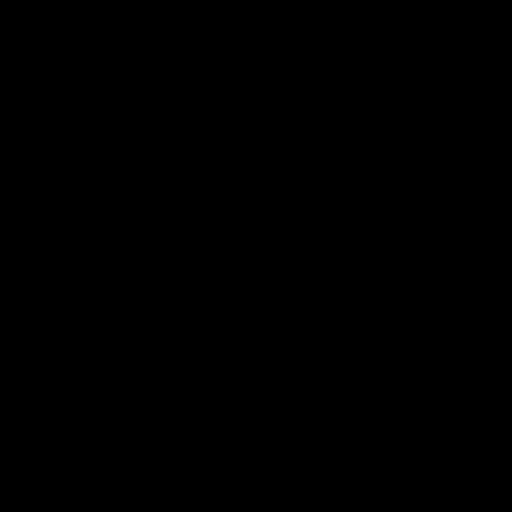

In [3]:
from controlnet_aux import OpenposeDetector
from PIL import Image
import numpy as np

openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

# Create a blank image (placeholder)
blank = Image.new("RGB", (512, 512), "white")

control_image = openpose(blank, include_face=True)
control_image.save("control_face.png")
control_image


In [4]:
import torch
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from PIL import Image

# Load ControlNet
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/control_v11p_sd15_openpose",
    torch_dtype=torch.float16
)

# Load Stable Diffusion + ControlNet
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16,
    safety_checker=None
).to("cuda")


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [5]:
prompt = """
Black and white forensic pencil sketch of a male suspect,
age between 25 and 30 years,
oval face with sharp jawline,
short black slightly wavy hair,
thick eyebrows,
medium-sized eyes,
straight medium-sized nose,
thin lips,
light beard and moustache,
neutral serious expression,
front-facing portrait,
perfectly centered face,
symmetrical facial structure,
police sketch style,
clean line art,
no background
"""

negative_prompt = """
tilted face, side view, profile view, head turned,
artistic style, cartoon, anime, distorted face
"""
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=control_image,
    num_inference_steps=30,
    guidance_scale=6.0,
    controlnet_conditioning_scale=1.0
).images[0]

image.save("suspect_sketch_controlnet.png")
image.show()


Token indices sequence length is longer than the specified maximum sequence length for this model (85 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['style , clean line art , no background']


  0%|          | 0/30 [00:00<?, ?it/s]

In [1]:
# import torch
# from diffusers import StableDiffusionPipeline

# # Load Stable Diffusion model
# model_id = "runwayml/stable-diffusion-v1-5"

# pipe = StableDiffusionPipeline.from_pretrained(
#     model_id,
#     torch_dtype=torch.float32,   # CPU requires float32
#     safety_checker=None
# ).to("cuda")                      # Use CPU instead of CUDA

# prompt = """Black and white pencil sketch of a male suspect,
# age around 25 to 30 years,
# oval face with a sharp jawline,
# medium skin tone,
# short black hair,
# slightly wavy hair texture,
# thick eyebrows,
# medium-sized eyes,
# straight medium-sized nose,
# thin lips,
# light beard and moustache,
# neutral and serious expression,
# front-facing portrait,
# realistic police sketch style,
# clean line art,
# no background
# """

# image = pipe(
#     prompt,
#     num_inference_steps=25,   # reduce steps for CPU
#     guidance_scale=6.0        # lower creativity
# ).images[0]

# image.save("suspect_sketch.png")
# image.show()


KeyboardInterrupt: 

In [ ]:
!pip install deepface opencv-python numpy

In [ ]:
from deepface import DeepFace
import numpy as np

# Path to your image (photo or sketch)
img_path = "suspect_sketch.png"

# Extract embedding using FaceNet
embedding_obj = DeepFace.represent(
    img_path=img_path,
    model_name="Facenet",
    enforce_detection=True
)

# Get the embedding vector
embedding = np.array(embedding_obj[0]["embedding"])

# Normalize the embedding (IMPORTANT for cosine similarity)
embedding = embedding / np.linalg.norm(embedding)

print("Embedding shape:", embedding.shape)
embedding

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d moritzm00/utkface-cropped

Dataset URL: https://www.kaggle.com/datasets/moritzm00/utkface-cropped
License(s): unknown
 71% 82.0M/116M [00:00<00:00, 795MB/s]
100% 116M/116M [00:00<00:00, 654MB/s] 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/utkface-cropped.zip', 'r')
zip_ref.extractall('/content/UTKFace')
zip_ref.close()

In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 22.1 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import faiss
from deepface import DeepFace

dataset_path = "/content/UTKFace/UTKFace"

embeddings = []
image_names = []

MAX_IMAGES = 200
count = 0

for img_name in os.listdir(dataset_path):

    if count >= MAX_IMAGES:
        break

    if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue

    img_path = os.path.join(dataset_path, img_name)

    try:
        embedding_obj = DeepFace.represent(
            img_path=img_path,
            model_name="Facenet",
            enforce_detection=False   # IMPORTANT for speed & stability
        )

        embedding = np.array(embedding_obj[0]["embedding"])
        embedding = embedding / np.linalg.norm(embedding)

        embeddings.append(embedding)
        image_names.append(img_name)
        count += 1

        if count % 20 == 0:
            print(f"Processed {count} images")

    except Exception:
        continue

embeddings = np.array(embeddings)

# Build FAISS index (cosine similarity)
dimension = embeddings.shape[1]
faiss_index = faiss.IndexFlatIP(dimension)
faiss_index.add(embeddings)

faiss.write_index(faiss_index, "face_embeddings.index")

print("✅ FAISS index created with", faiss_index.ntotal, "embeddings")


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5


25-12-21 13:48:22 - 🔗 facenet_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5 to /root/.deepface/weights/facenet_weights.h5...


100%|██████████| 92.2M/92.2M [00:00<00:00, 212MB/s]


Processed 20 images
Processed 40 images
Processed 60 images
Processed 80 images
Processed 100 images
Processed 120 images
Processed 140 images
Processed 160 images
Processed 180 images
Processed 200 images
✅ FAISS index created with 200 embeddings


In [ ]:
import json

index_to_image = {}

for i, img_name in enumerate(image_names):
    index_to_image[i] = img_name

with open("index_to_image.json", "w") as f:
    json.dump(index_to_image, f)

print("✅ Mapping saved")


✅ Mapping saved


In [ ]:
print(torch.cuda.is_available())

False
